<a href="https://colab.research.google.com/github/Manishkatel/DigitalImageProcessing/blob/main/DigitalImageProcessing0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg to Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg


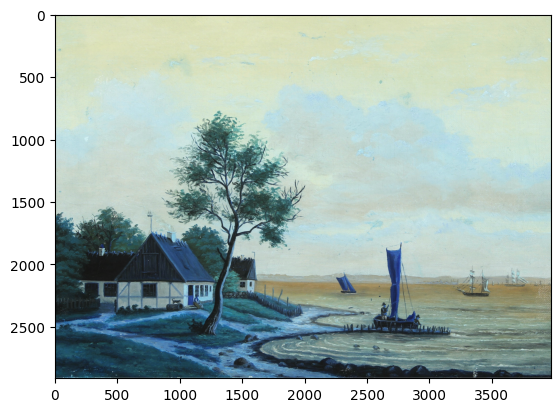

In [ ]:
img = cv2.imread('Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg')
plt.imshow(img)

In [ ]:
print(img)
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

[[[213 219 184]
  [209 215 180]
  [209 215 180]
  ...
  [207 221 187]
  [208 222 188]
  [208 221 189]]

 [[211 217 182]
  [209 215 180]
  [210 216 181]
  ...
  [207 221 187]
  [208 222 188]
  [209 222 190]]

 [[213 220 185]
  [213 220 185]
  [215 222 187]
  ...
  [206 219 187]
  [209 222 190]
  [208 223 191]]

 ...

 [[ 30  59  74]
  [ 31  60  75]
  [ 31  60  75]
  ...
  [ 29  31  32]
  [ 30  32  33]
  [ 30  32  33]]

 [[ 85 103 114]
  [ 86 104 115]
  [ 86 104 115]
  ...
  [ 78  80  80]
  [ 79  81  81]
  [ 79  81  81]]

 [[224 236 246]
  [226 238 248]
  [226 238 248]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]]
Image Properties
- Number of Pixels: 34708128
- Shape/Dimensions: (2912, 3973, 3)


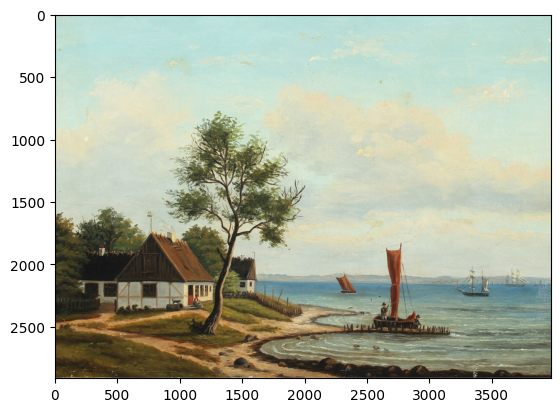

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

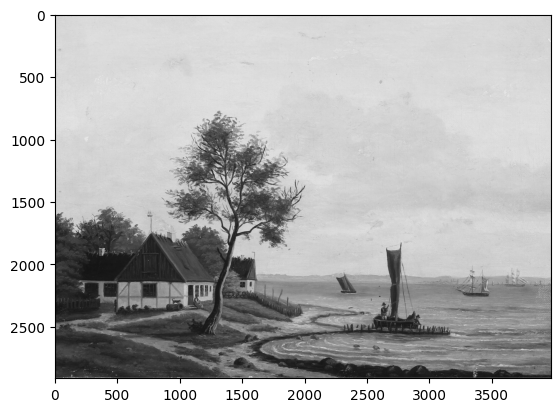

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

In [ ]:
print(gray_img)

[[213 209 209 ... 213 214 213]
 [211 209 210 ... 213 214 214]
 [214 214 216 ... 211 214 215]
 ...
 [ 52  53  53 ...  31  32  32]
 [ 99 100 100 ...  79  80  80]
 [234 236 236 ... 239 239 239]]


In [ ]:
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color = np.uint8(average_color)
print(average_color)

[168 175 155]


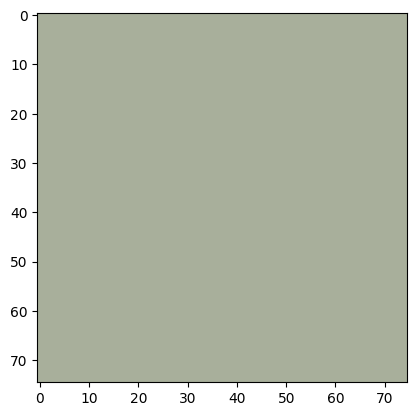

In [ ]:
average_color_img = np.array([[average_color]*75]*75, np.uint8)
plt.imshow(average_color_img)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brad_pitt.jpg to brad_pitt.jpg


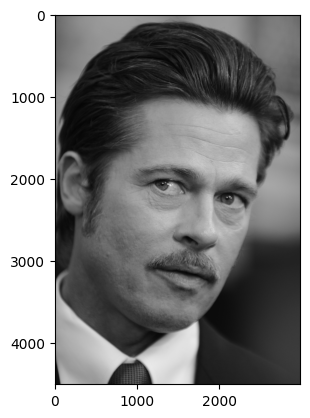

In [ ]:
img_gray = cv2.imread('brad_pitt.jpg',0)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))

In [ ]:
h, w = img_gray.shape[:2]
print(h, w)

4504 2988


In [ ]:
grad_img = np.asarray(img_gray)
print(grad_img)

[[ 97  97  97 ... 100 104 106]
 [ 98 100 102 ... 101 104 106]
 [ 97  99 100 ... 104 104 103]
 ...
 [ 13  13  14 ...  52  52  52]
 [ 13  13  13 ...  53  53  52]
 [ 14  15  14 ...  53  53  51]]


In [ ]:
for i in range(0,h):
  for j in range(0,w-1):
    min_pix_val = min(img_gray[i][j+1], img_gray[i][j])
    if min_pix_val == img_gray[i][j+1]:
      temp_arr = img_gray[i][j] - img_gray[i][j+1]
    else:
      temp_arr = img_gray[i][j+1] - img_gray[i][j]
      grad_img[i,j] = temp_arr


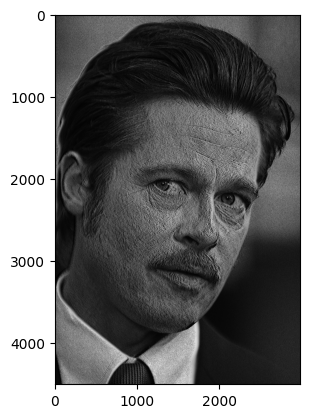

In [ ]:
from PIL import Image
gradient_img = Image.fromarray(grad_img)
plt.imshow(gradient_img, cmap='gray')

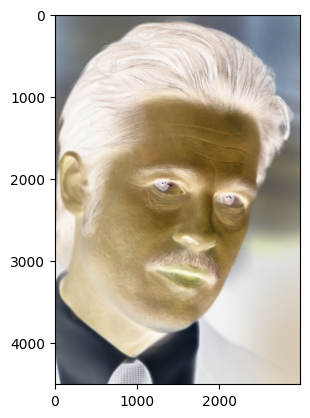

In [ ]:
img = cv2.imread('brad_pitt.jpg')
B,G,R = cv2.split(img)
B[:] = [255-x for x in B]
G[:] = [255-x for x in G]
R[:] = [255-x for x in R]

neg_img = cv2.merge((B, G, R))
plt.imshow(neg_img)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving upstate-ny.jpg to upstate-ny.jpg


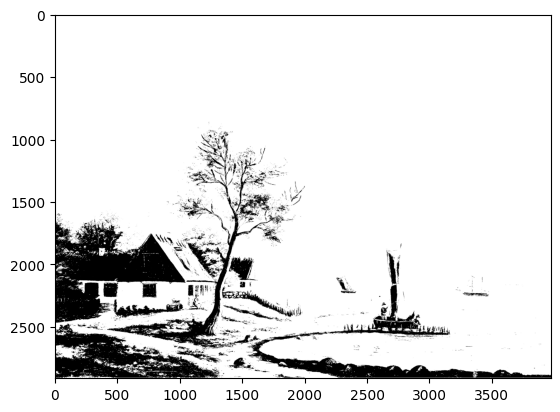

In [ ]:
# threshold for grayscale image from the scenery pic
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

## Experiment with multiple numbers

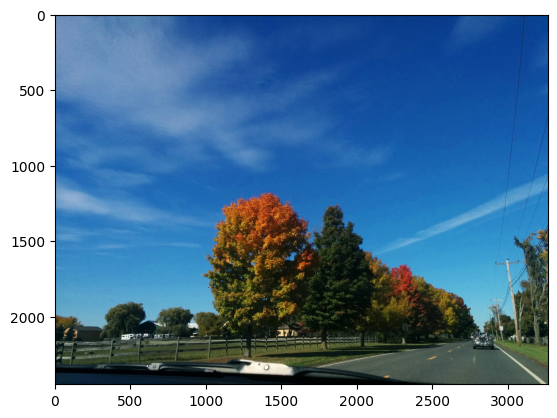

In [ ]:
## Let's see how we can use this in noise removal

# let us set some threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)

upstate = cv2.imread('upstate-ny.jpg')
# Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs.
# In using this color model, a color is specified then white or black is added to easily make color adjustments.
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

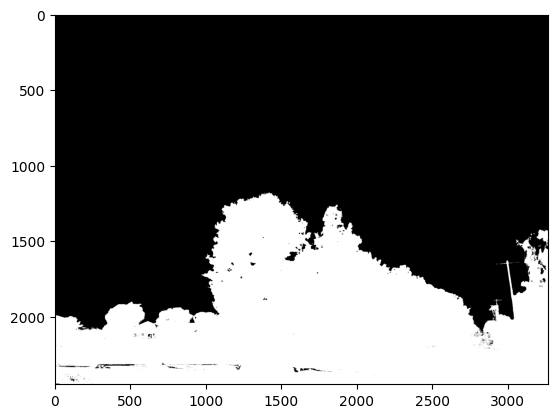

In [ ]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

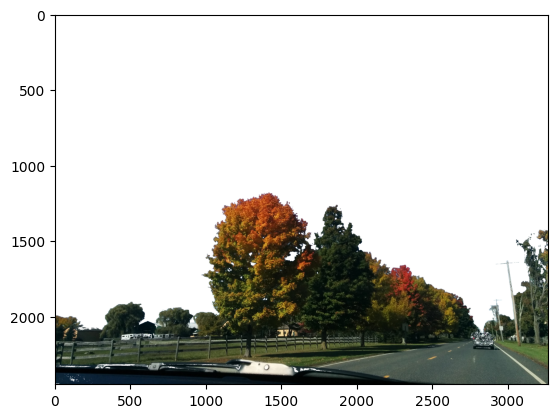

In [ ]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))


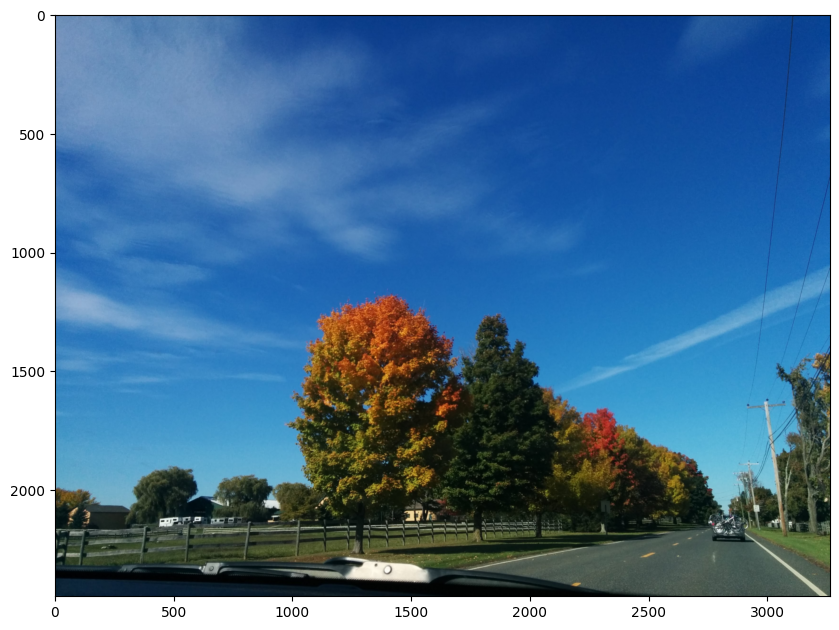

In [ ]:
img_blur_small = cv2.GaussianBlur(upstate, (5,5), 0)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

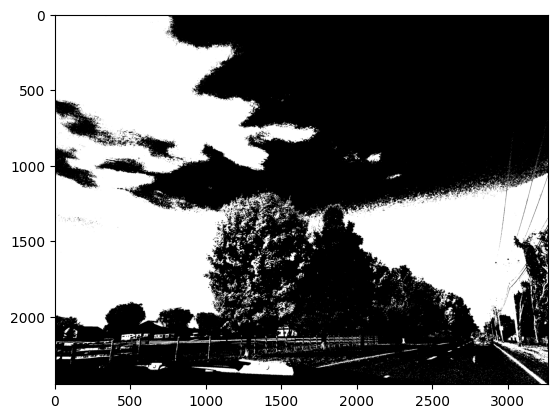

In [ ]:
gray_img = cv2.cvtColor(upstate, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

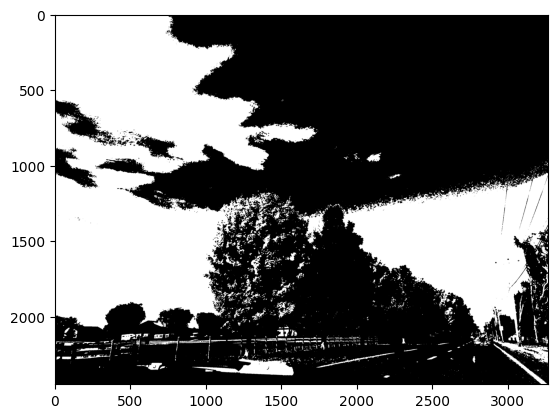

In [ ]:
#threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

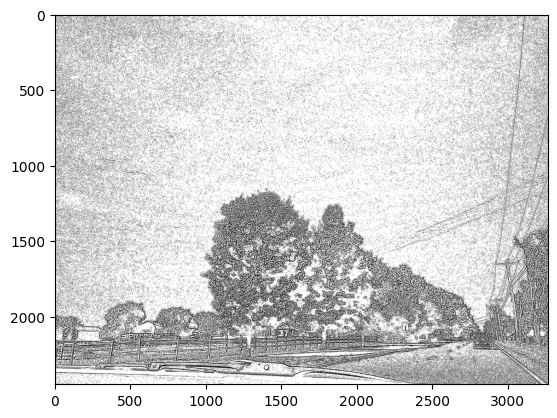

In [ ]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

In [ ]:
uploaded = files.upload()

Saving coins.jpg to coins.jpg


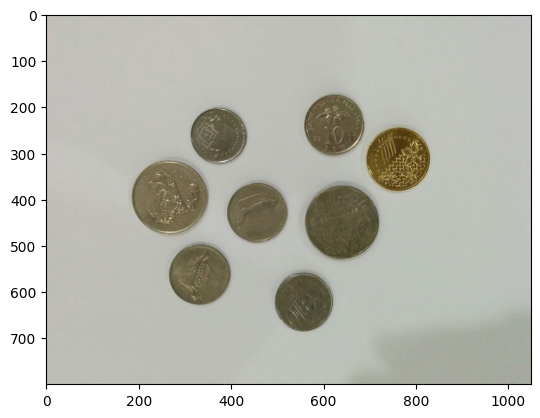

In [ ]:
coins = cv2.imread('coins.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

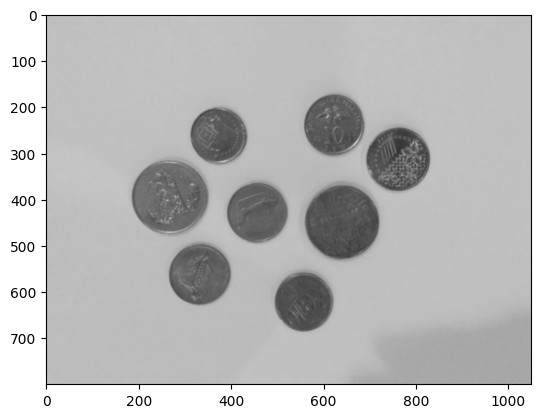

In [ ]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

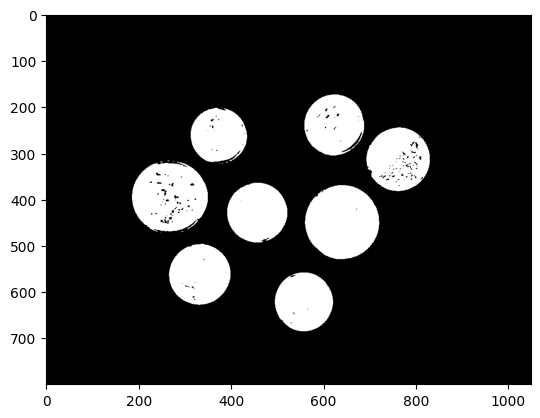

In [ ]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))